autoencoder: https://towardsdatascience.com/applied-deep-learning-part-3-autoencoders-1c083af4d798 \
autoencoder: https://github.com/ardendertat/Applied-Deep-Learning-with-Keras/blob/master/notebooks/Part%203%20-%20Autoencoders.ipynb \
Unet: https://towardsdatascience.com/unet-line-by-line-explanation-9b191c76baf5 \
Convolutional autoencoder maths: https://pgaleone.eu/neural-networks/2016/11/24/convolutional-autoencoders/ \
Convolutional autoencoder code: https://blog.keras.io/building-autoencoders-in-keras.html

In [126]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import keras
from keras import layers
from keras.models import Model
from keras.layers import Dense, Input
from keras.datasets import mnist
from keras.optimizers import Adam
from keras.callbacks import TensorBoard

In [41]:
#CONVOLUTIONAL AUTOENCODER

input_img = keras.Input(shape=(28, 28, 1))

x = layers.Conv2D(16, (3, 3), activation='relu', padding='same')(input_img)
x = layers.MaxPooling2D((2, 2), padding='same')(x)
x = layers.Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = layers.MaxPooling2D((2, 2), padding='same')(x)
x = layers.Conv2D(8, (3, 3), activation='relu', padding='same')(x)
encoded = layers.MaxPooling2D((2, 2), padding='same')(x)

# at this point the representation is (4, 4, 8) i.e. 128-dimensional

x = layers.Conv2D(8, (3, 3), activation='relu', padding='same')(encoded)
x = layers.UpSampling2D((2, 2))(x)
x = layers.Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = layers.UpSampling2D((2, 2))(x)
x = layers.Conv2D(16, (3, 3), activation='relu')(x)
x = layers.UpSampling2D((2, 2))(x)
decoded = layers.Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

convolutional_autoencoder = keras.Model(input_img, decoded)
convolutional_autoencoder.compile(optimizer='adam', loss='binary_crossentropy')


In [119]:
(x_train_conv, _), (x_test_conv, _) = mnist.load_data()

x_train_conv = x_train_conv.astype('float32') / 255.
x_test_conv = x_test_conv.astype('float32') / 255.
x_train_conv = np.reshape(x_train_conv, (len(x_train_conv), 28, 28, 1))
x_test_conv = np.reshape(x_test_conv, (len(x_test_conv), 28, 28, 1))

In [120]:
import random
x_train_lines_conv=np.empty_like(x_train_conv)
x_train_lines_conv = x_train_conv.copy()
x_test_lines_conv=np.empty_like(x_test_conv)
x_test_lines_conv = x_test_conv.copy()

for t in range(0,x_train_lines_conv.shape[0]):
    lines_train = np.array([9,10,11,12,13,14,15,16])
#     for i in range(0,4):
#         rands = np.append(rands,random.randint(0,27))
    trainMatrix_conv = x_train_lines_conv[t]
    for y in lines_train:
        for i in range(0,28):
            trainMatrix_conv[np.int16(y)][i] = 0
    x_train_lines_conv[t] = trainMatrix_conv
    
    
    
for t in range(0,x_test_lines_conv.shape[0]):
    lines_test = np.array([9,10,11,12,13,14,15,16])
#     for i in range(0,4):
#         rands = np.append(rands,random.randint(0,27))
    testMatrix_conv = x_test_lines_conv[t]
    for y in lines_test:
        for i in range(0,28):
            testMatrix_conv[np.int16(y)][i] = 0
    x_test_lines_conv[t] = testMatrix_conv

In [128]:
convolutional_autoencoder._get_distribution_strategy = lambda: None
convolutional_autoencoder.fit(x_train_lines_conv, x_train_conv, epochs=5, batch_size=128, shuffle=True, validation_data=(x_test_lines_conv, x_test_conv), callbacks=[TensorBoard(log_dir='/tmp/convolutional_autoencoder')])

Train on 60000 samples, validate on 10000 samples
Epoch 1/5
  384/60000 [..............................] - ETA: 1:13 - loss: 0.1269

/home/cristille/anaconda3/envs/py27/lib/python2.7/site-packages/keras/callbacks/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.268839). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)
/home/cristille/anaconda3/envs/py27/lib/python2.7/site-packages/keras/callbacks/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.155122). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)


60000/60000 [==============================] - 27s 457us/step - loss: 0.1255 - val_loss: 0.1241
Epoch 2/5
60000/60000 [==============================] - 27s 450us/step - loss: 0.1247 - val_loss: 0.1240
Epoch 3/5
60000/60000 [==============================] - 27s 448us/step - loss: 0.1238 - val_loss: 0.1225
Epoch 4/5
60000/60000 [==============================] - 27s 455us/step - loss: 0.1233 - val_loss: 0.1219
Epoch 5/5
60000/60000 [==============================] - 27s 456us/step - loss: 0.1226 - val_loss: 0.1233


[ 2. 10. 20. 25. 13. 13. 22.  2. 15. 12.  8. 12.]


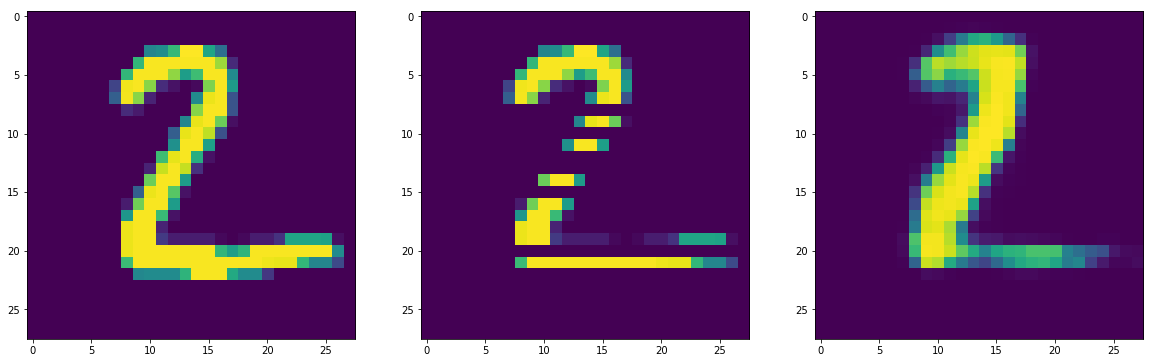

In [138]:
imageID = 1
fig_conv, (ax1_conv, ax2_conv, ax3_conv) = plt.subplots(1,3)
image_lines_conv = x_test_conv[imageID].copy()
randsTest = np.array([])

# for y in range(9,12):
#     for i in range(0,28):
#         image_lines_conv[1][y][i] = 0
        
for i in range(0,12):
    randsTest = np.append(randsTest,random.randint(0,27))
print (randsTest)
for y in randsTest:
    for i in range(0,28):
        image_lines_conv[np.int16(y)][i] = 0

image_lines_conv = np.expand_dims(image_lines_conv, 0)
image_pred_conv = convolutional_autoencoder.predict(image_lines_conv)
image_lines_conv = np.squeeze(image_lines_conv, 0)

ax1_conv.imshow(x_test_conv[imageID].reshape(28,28))
ax2_conv.imshow(image_lines_conv.reshape(28,28))
ax3_conv.imshow(image_pred_conv.reshape(28,28))
fig_conv.set_size_inches(20,10)
fig_conv.show()

In [92]:
#SIMPLE AUTOENCODER

In [72]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

In [101]:
import random
x_train_lines=np.empty_like(x_train)
x_train_lines = x_train.copy()

for t in range(0,x_train_lines.shape[0]):
    rands = np.array([])
    lines = np.array([9,10,11,12,13,14,15,16])
#     for i in range(0,4):
#         rands = np.append(rands,random.randint(0,27))
    testMatrix = x_train_lines[t].reshape(28,28)
    for y in lines:
        for i in range(0,28):
            testMatrix[np.int16(y)][i] = 0
    x_train_lines[t] = testMatrix.reshape(1,784)

In [102]:
input_size = 784
hidden_size = 256
code_size = 32

input_img = Input(shape=(input_size,))
hidden_1 = Dense(hidden_size, activation='relu')(input_img)
code = Dense(code_size, activation='relu')(hidden_1)
hidden_2 = Dense(hidden_size, activation='relu')(code)
output_img = Dense(input_size, activation='sigmoid')(hidden_2)

autoencoder = Model(input_img, output_img)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')
autoencoder.fit(x_train_lines, x_train, epochs=5)

Epoch 1/5
60000/60000 [==============================] - 7s 113us/step - loss: 0.1477
Epoch 2/5
60000/60000 [==============================] - 7s 120us/step - loss: 0.1162
Epoch 3/5
60000/60000 [==============================] - 8s 129us/step - loss: 0.1105
Epoch 4/5
60000/60000 [==============================] - 7s 119us/step - loss: 0.1075
Epoch 5/5
60000/60000 [==============================] - 7s 112us/step - loss: 0.1057


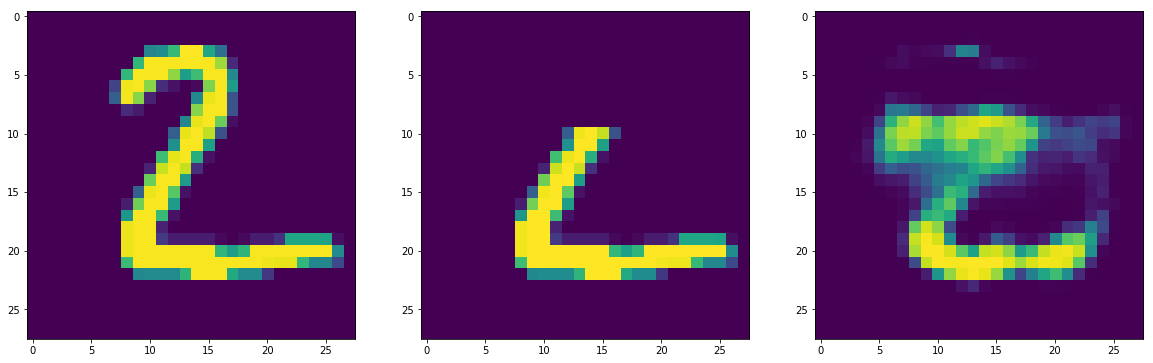

In [105]:
fig, (ax1, ax2, ax3) = plt.subplots(1,3)
image = x_test[1].copy().reshape(28,28)
image_lines = image.copy()


for y in range(0,10):
    for i in range(0,28):
        image_lines[y][i] = 0
image_pred = autoencoder.predict(image_lines.reshape(1,784)).reshape(28,28)

ax1.imshow(image)
ax2.imshow(image_lines)
ax3.imshow(image_pred)
fig.set_size_inches(20,10)
fig.show()